In [55]:
import numpy as np
import pandas as pd
import tables as tb
import matplotlib
import matplotlib.pyplot as plt
import Core.fitFunctions as fit
import Database.loadDB as DB
%matplotlib inline

In [3]:
datafolder = "/Users/Gonzalo/github/IC/data/DATA/run_2980/"
store = pd.HDFStore(datafolder + "Kr_dataset_2.h5")
DS = store["data"]
store.close()

In [5]:
DS.describe()

,A,E,F,H,P,R,S,T,W,X,Y,Z,e
count,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000,211187.000000
mean,18713.597096,6169.135932,2098.481374,2255.717923,0.076298,127.691549,7.384573,436.021772,8.672821,9.537127,6.255746,164.421371,44.919796
std,3225.465025,610.812346,1210.543323,597.983203,1.744322,165.526150,5.331608,167.727824,1.979858,147.155031,148.052087,167.665241,26.159179
min,7828.000000,4000.078613,0.000000,799.000000,-3.141521,0.165572,0.808520,0.000000,4.000000,-225.000000,-225.000000,3.000000,0.000000
25%,16664.000000,5851.287354,1047.000000,1815.000000,-1.380018,90.891964,2.471629,360.000000,7.000000,-63.544570,-70.571753,44.000000,22.000000
50%,18447.000000,6303.259766,2100.000000,2100.000000,0.155084,131.116300,7.076802,507.000000,9.000000,10.399268,8.182923,93.000000,45.000000
75%,20405.000000,6608.457275,3146.000000,2574.000000,1.529752,164.869338,10.895969,557.000000,10.000000,82.272895,81.495849,240.000000,68.000000
max,62850.000000,7797.241211,4197.000000,7436.000000,3.141580,14142.135624,280.035950,1131.000000,15.000000,10000.000000,10000.000000,1098.000000,90.000000


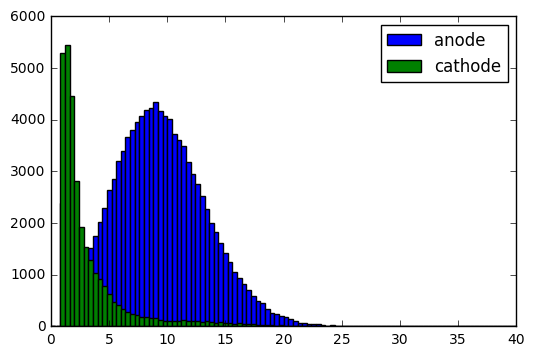

In [37]:
h = plt.hist(DS[DS["Z"] < 100.].S, 100, range=(0,40.), label="anode")
h = plt.hist(DS[DS["Z"] > 400.].S, 100, range=(0,40.), label="cathode")
plt.legend()
#plt.yscale("log")

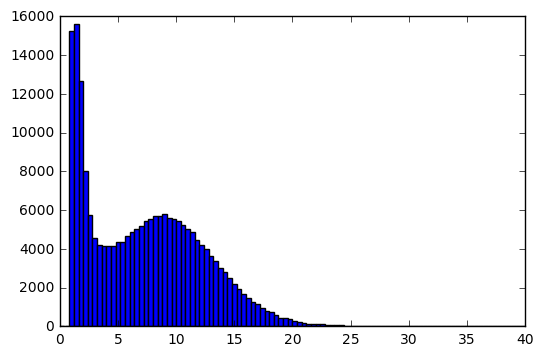

In [14]:
h = plt.hist(DS.S, 100, range=(0,40.))

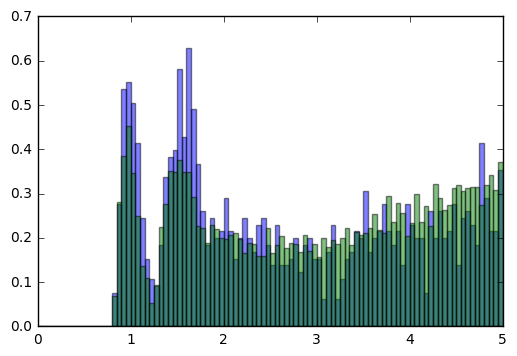

In [24]:
h = plt.hist(DS[(DS["Z"] < 100.) & (DS["R"] < 50.) ].S, 100, range=(0,5.), alpha=0.5, normed=True)
h = plt.hist(DS[(DS["Z"] < 100.) & (DS["R"] > 150.) ].S, 100, range=(0,5.), alpha=0.5, normed=True)

(0, 0.0015)

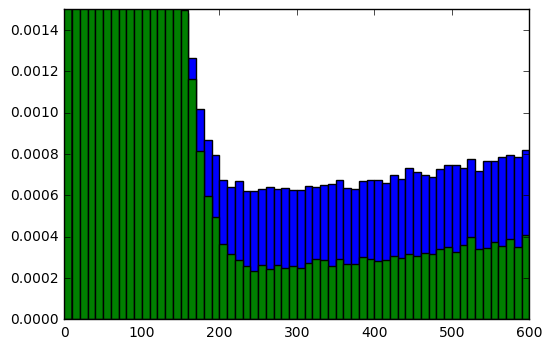

In [47]:
h1 = plt.hist(DS.Z, 60, range=(0, 600), normed=True)
h2 = plt.hist(DS[DS.S > 3.].Z, 60, range=(0, 600), normed=True)
plt.ylim((0, 0.0015))


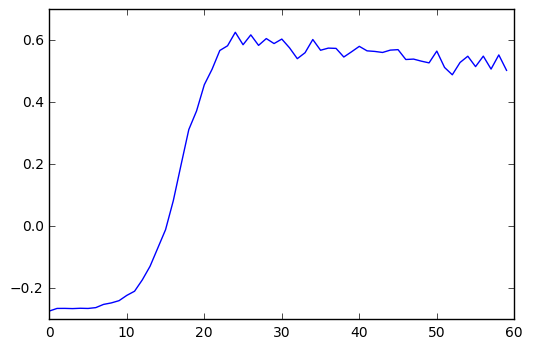

In [48]:
plt.plot(1-h2[0]/h1[0])

(0, 30)

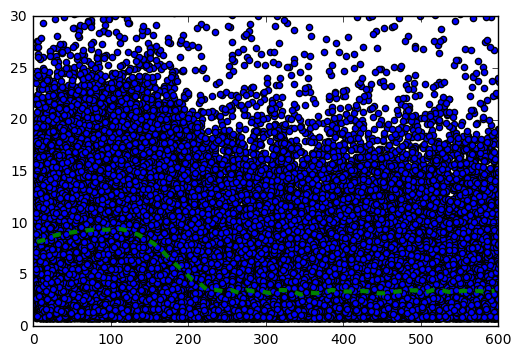

In [50]:
zp, sp, se = fit.profileX(DS.Z.values, DS.S.values, 60, (0., 600.), (0., 50.))
plt.scatter(DS.Z, DS.S)
plt.plot(zp, sp, "g--", linewidth=3)
plt.xlim((0,600))
plt.ylim((0,30))

In [52]:
datafile = "/Users/Gonzalo/github/IC/data/DATA/test_run_2980.h5"
f = tb.open_file(datafile)
print(f)

/Users/Gonzalo/github/IC/data/DATA/test_run_2980.h5 (File) ''
Last modif.: 'Sun Nov 27 18:07:25 2016'
Object Tree: 
/ (RootGroup) ''
/Deconvolution (Group) ''
/Deconvolution/BL (EArray(91, 12, 3), shuffle, zlib(4)) ''
/Deconvolution/Parameters (Table(1,)) 'Deconvolution parameters'
/RD (Group) ''
/RD/pmtblr (EArray(91, 12, 48000), zlib(4)) ''
/RD/pmtcwf (EArray(91, 12, 48000), shuffle, zlib(4)) ''
/RD/pmtrwf (EArray(91, 12, 48000), zlib(4)) ''
/RD/sipmrwf (EArray(91, 1792, 1200), zlib(4)) ''
/Run (Group) ''
/Run/events (Table(91,)) ''
/Run/runInfo (Table(1,)) ''
/Sensors (Group) ''
/Sensors/DataBLR (Table(12,)) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1792,)) ''
/ZS (Group) ''
/ZS/BLR (EArray(91, 12, 48000), shuffle, zlib(4)) ''
/ZS/PMT (EArray(91, 12, 48000), shuffle, zlib(4)) ''
/ZS/SiPM (EArray(91, 1792, 1200), shuffle, zlib(4)) ''



In [60]:
DS[(DS.Z < 100.) & (DS.S > 10.) & (DS.F==0)].e.values

array([18, 29, 40, 43, 54, 56, 63, 76, 77, 86])

In [56]:
adc_to_pes = abs(1.0 / DB.DataPMT()["adc_to_pes"].values.reshape(12, 1))

4755.54098487


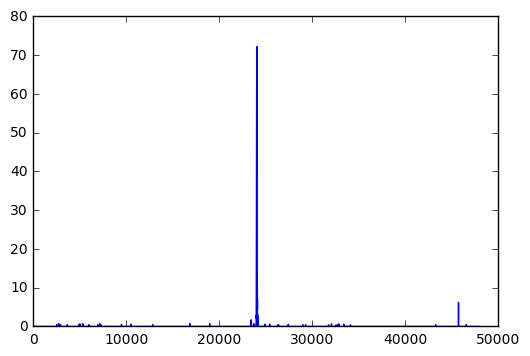

>
42827.3212384


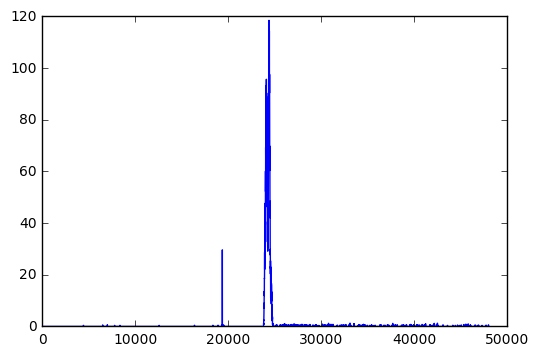

>
10223.1448175


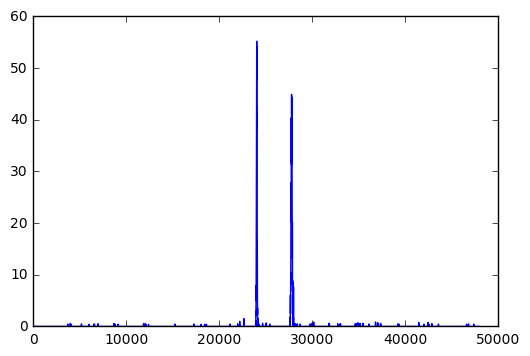

>
6746.33002468


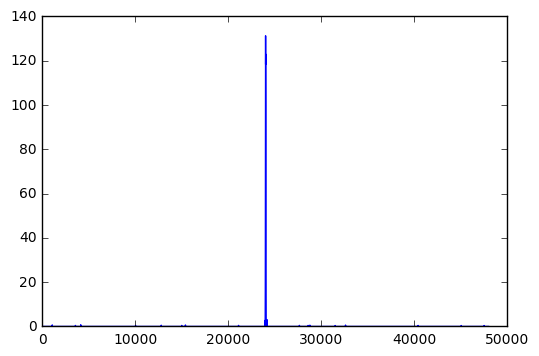

>
9858.88572057


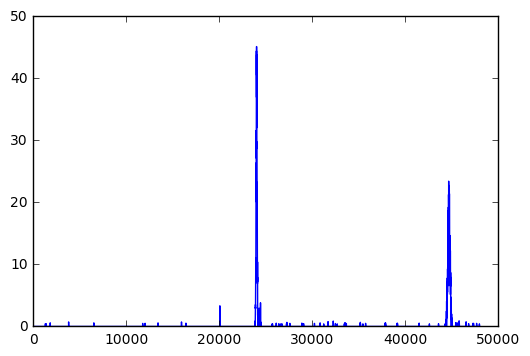

>
6187.42901232


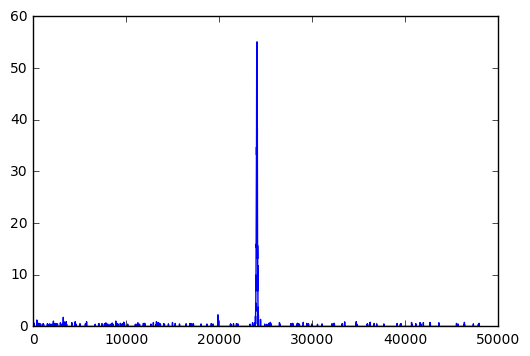

>
41100.6721154


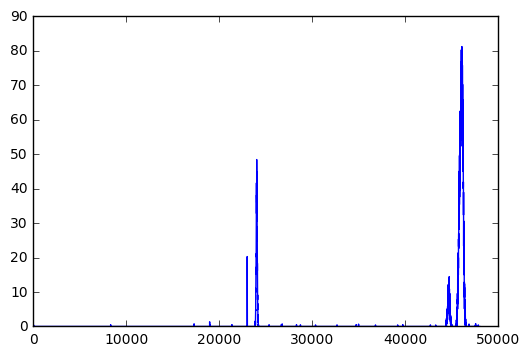

>
10752.0044024


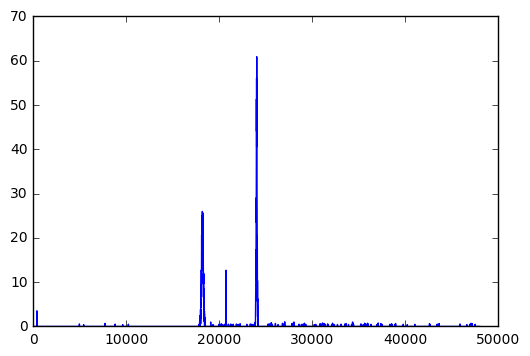

>
9122.14586655


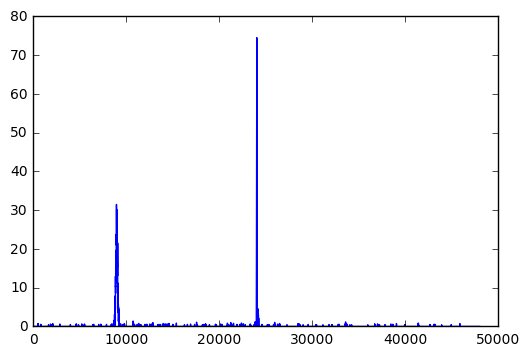

>
6558.24929145


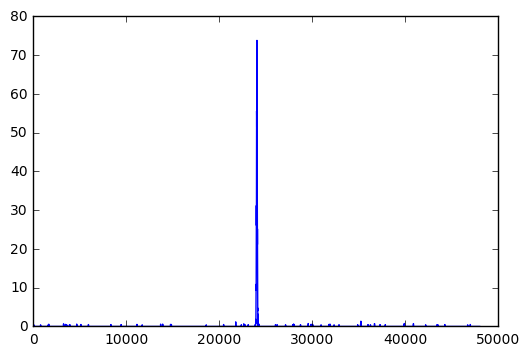

>
7470.89704305


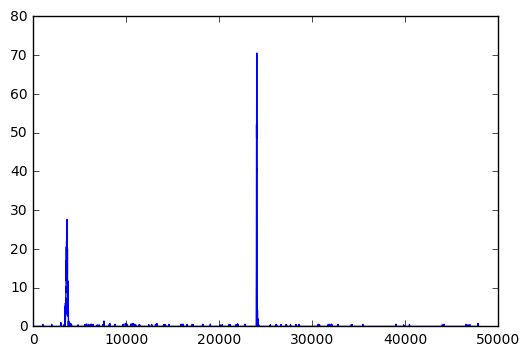

>
6265.3031266


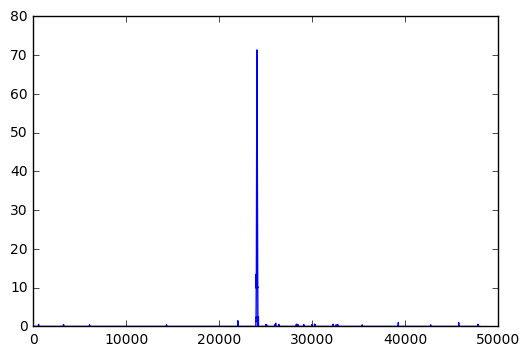

>
7352.4642743


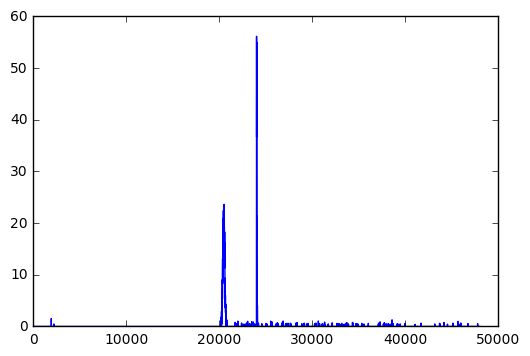

>
15600.1141505


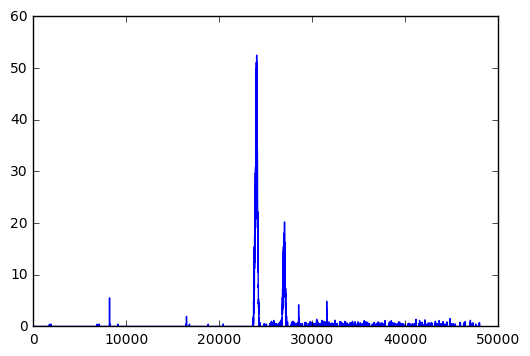

>
6281.5467348


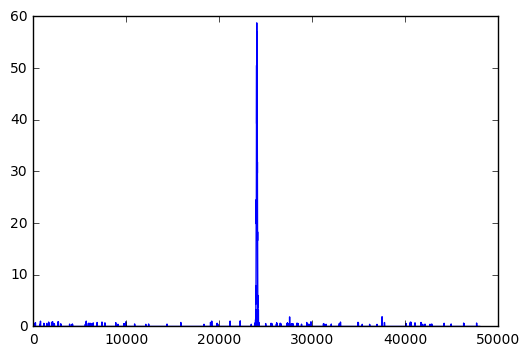

>
4581.78516652


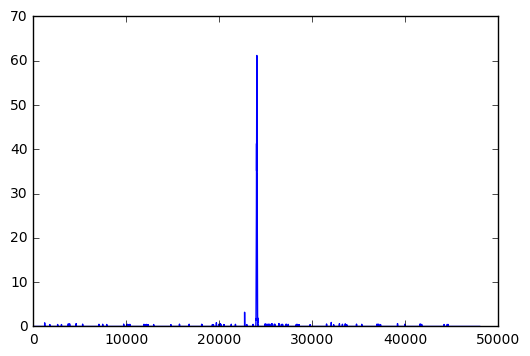

>
5581.4810675


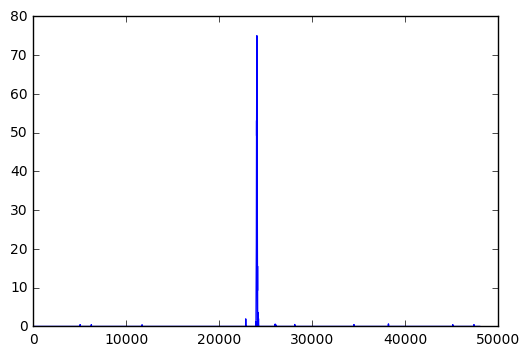

>
75372.5004912


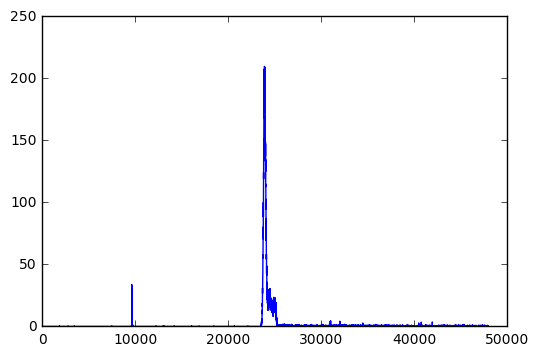

>
5013.05519234


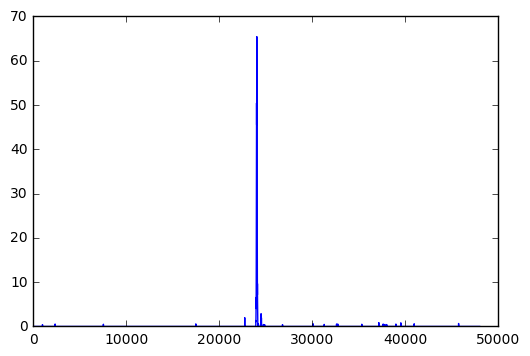

>
15205.2347031


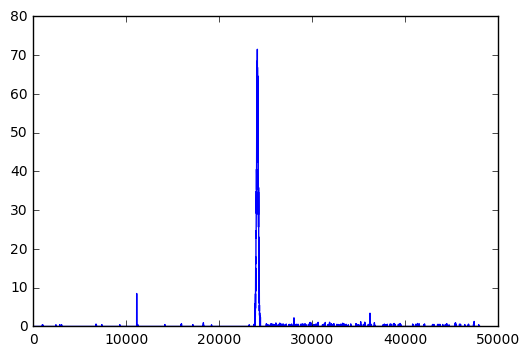

>
6419.98170115


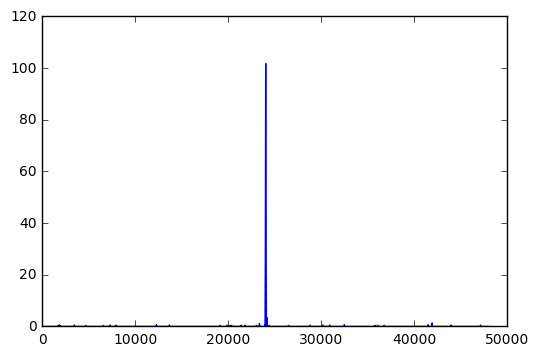

>
7280.38588008


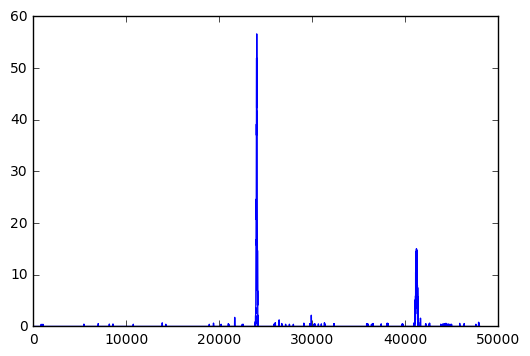

>
14722.6704611


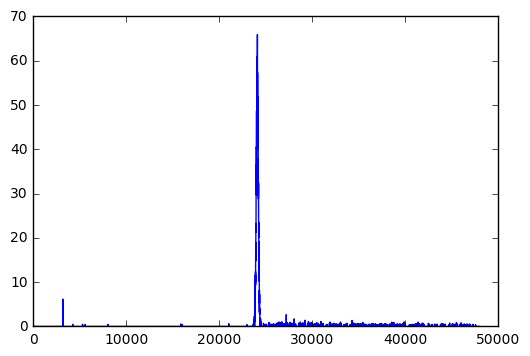

>
6357.07226635


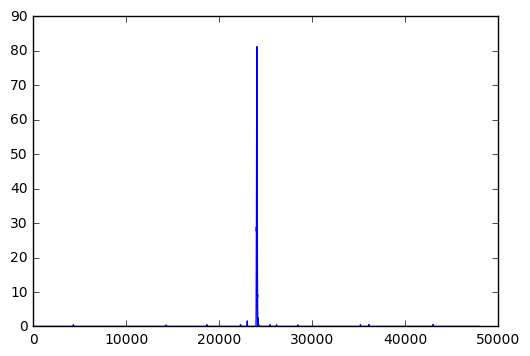

>
5942.42529699


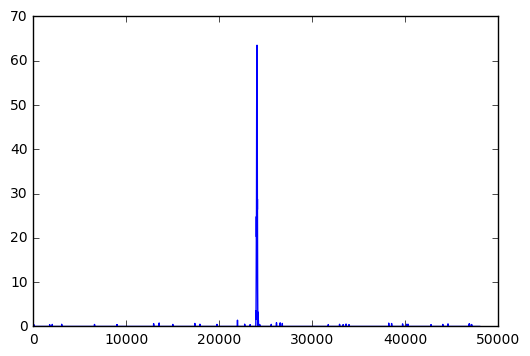

>
6373.95662751


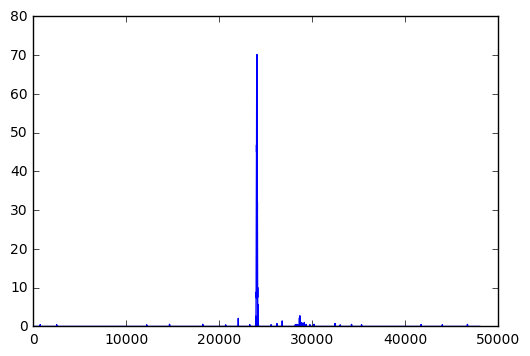

>
11152.757393


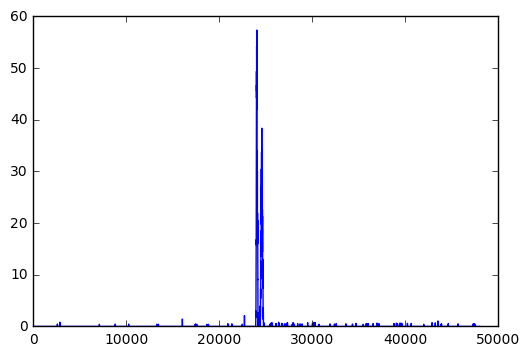

>
5973.82493069


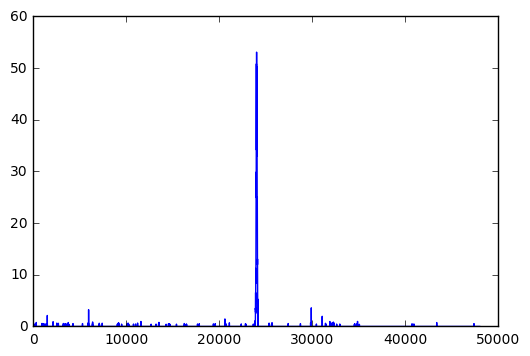

>
4463.24266119


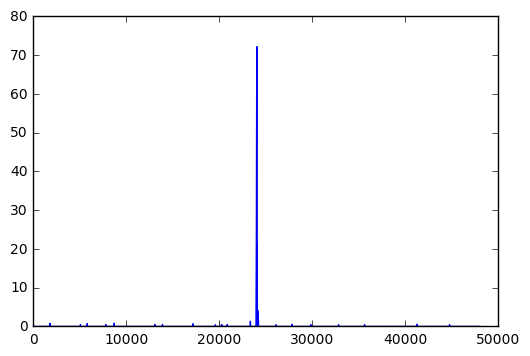

>
6225.1320063


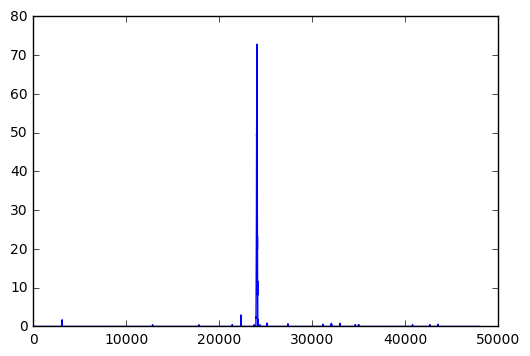

>
10221.819322


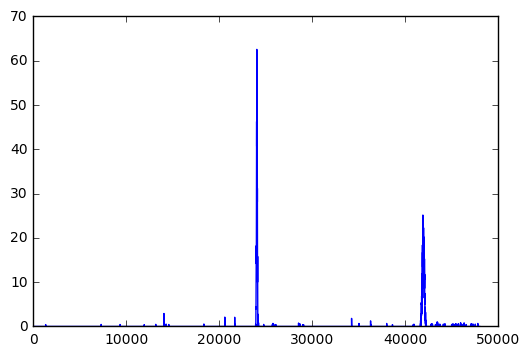

>
5114.77747453


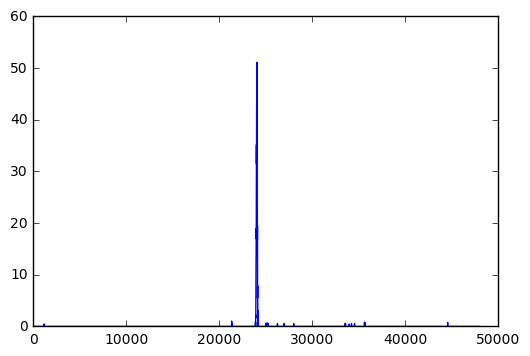

>
52504.9448312


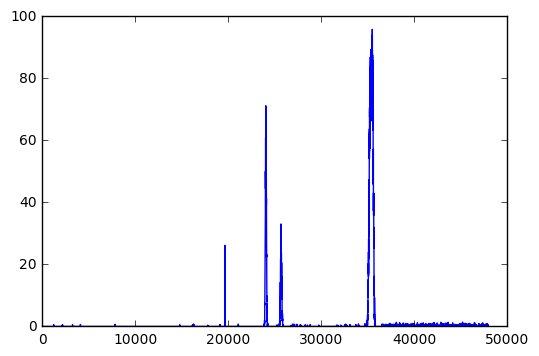

>
5829.31194176


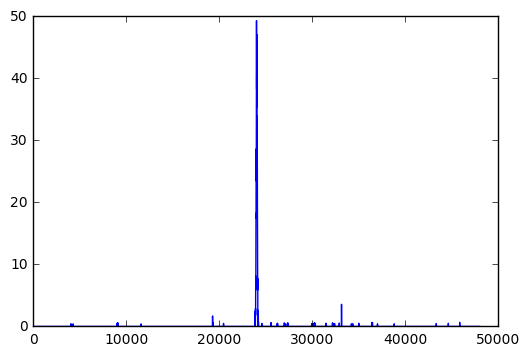

>
6045.45017544


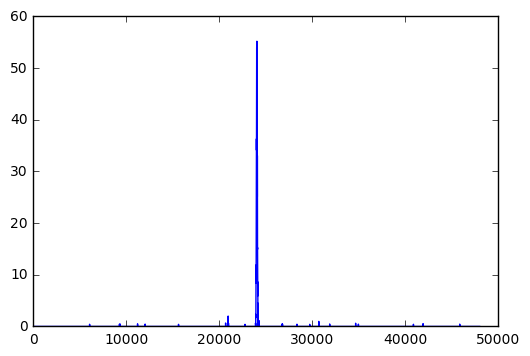

>
22579.1195385


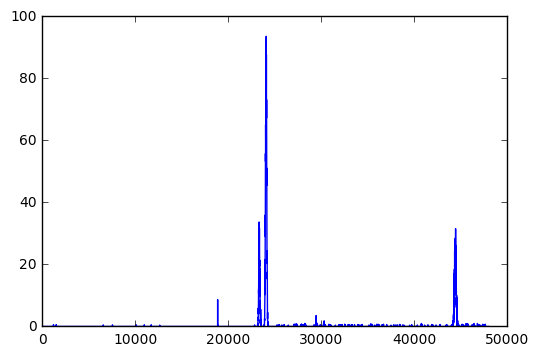

>
6162.89602346


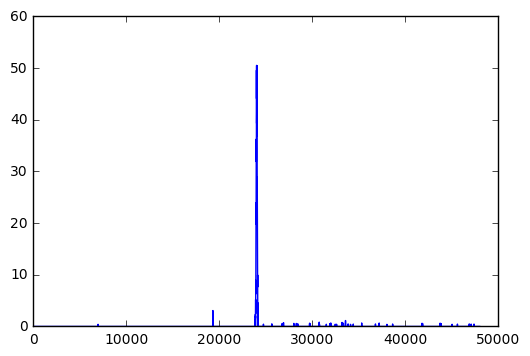

>
5515.99122795


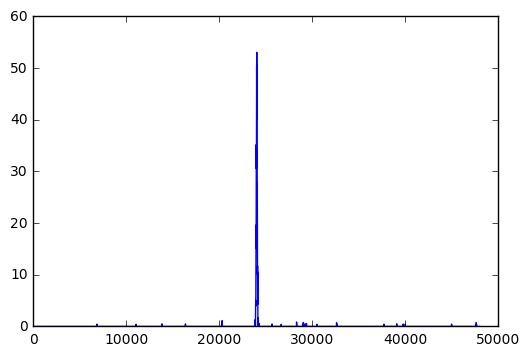

>
5625.03977375


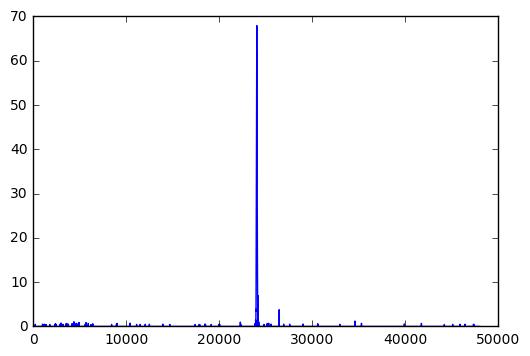

>
16367.9374224


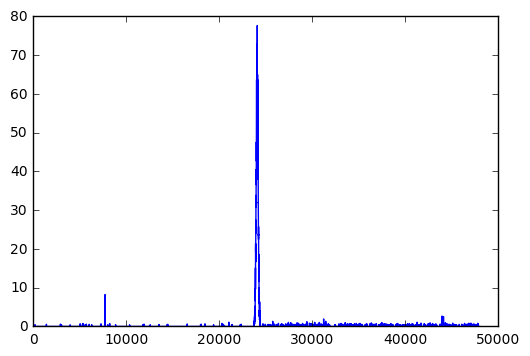

>
5795.11178657


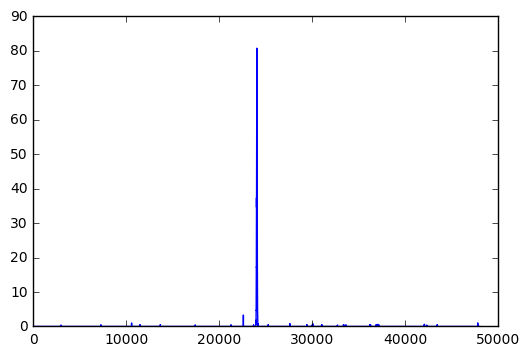

>
6057.48569451


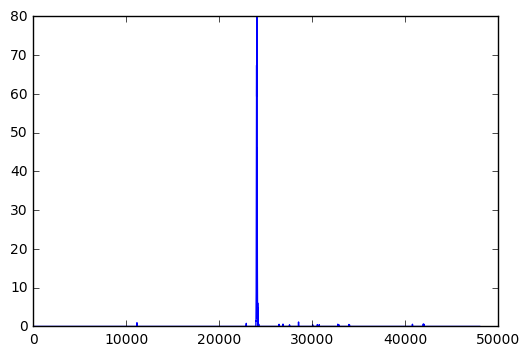

>
6007.69334287


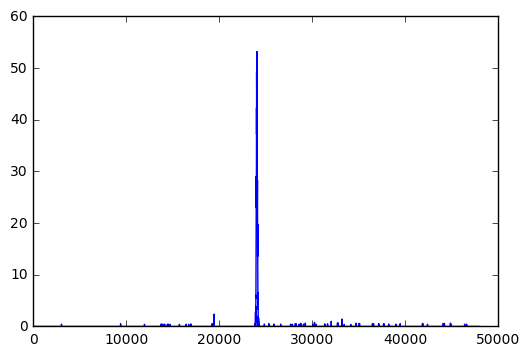

>
5720.68027601


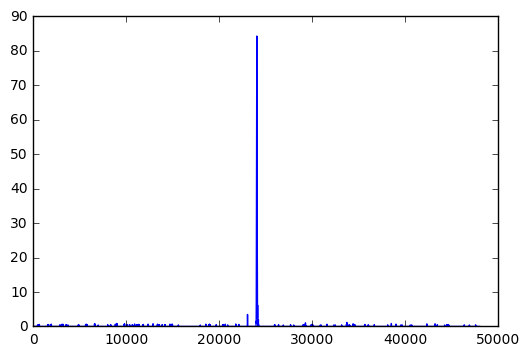

>
6038.87017299


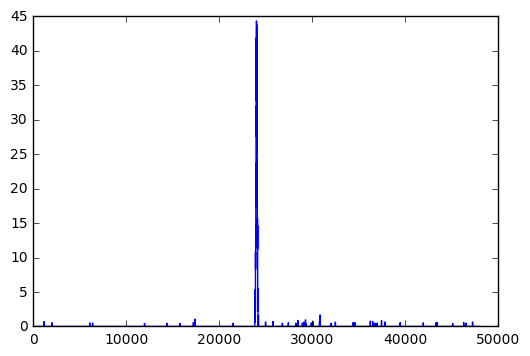

>
8576.09775036


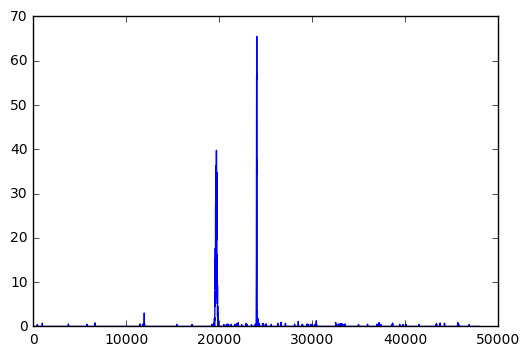

>
6559.80863329


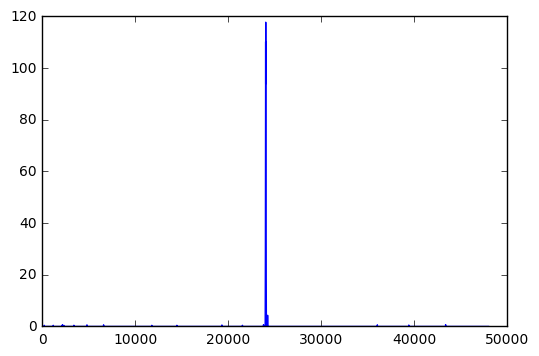

>
6886.07295554


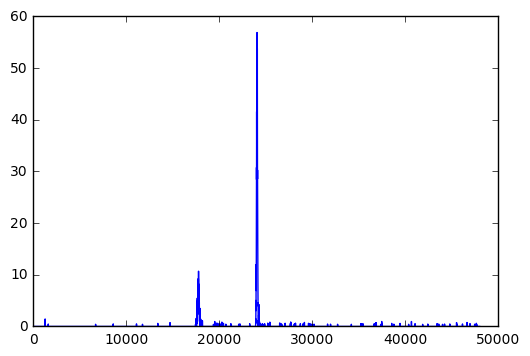

>
94105.5355717


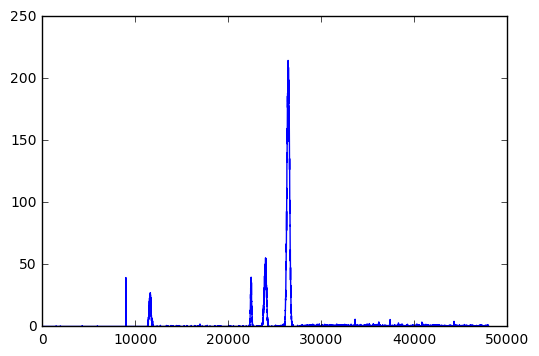

>
5891.40954918


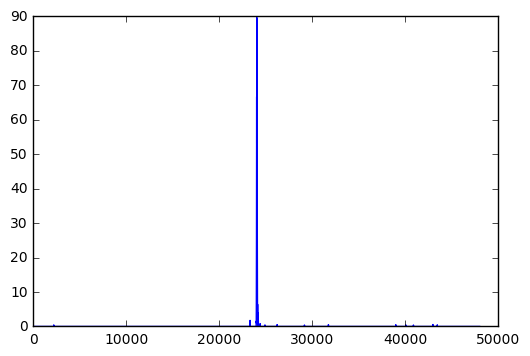

>
2471.48063289


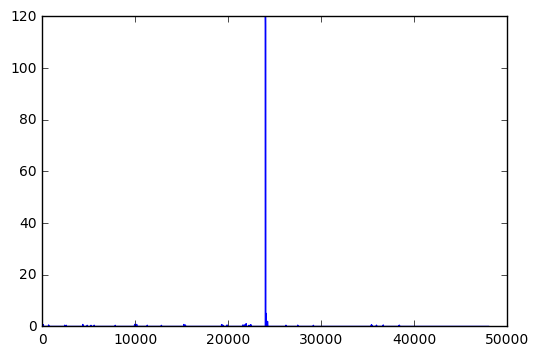

>
11558.4836807


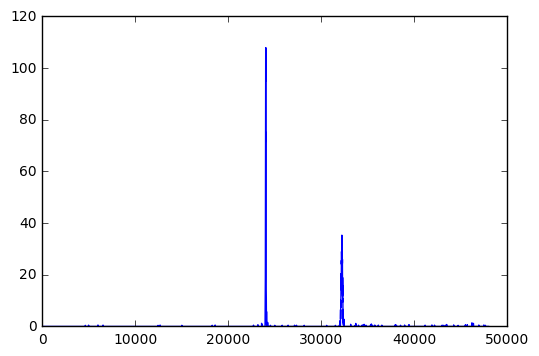

>
174751.452017


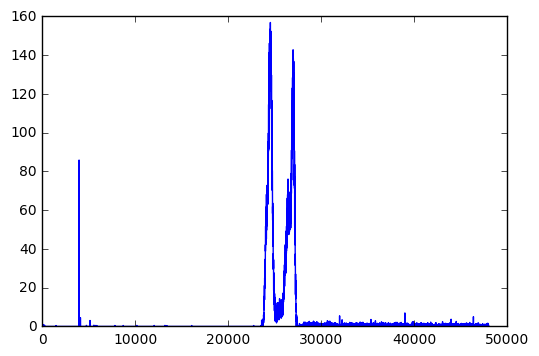

>
4093.85664794


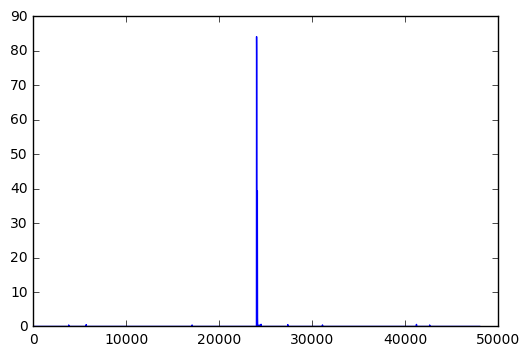

>
6203.25845639


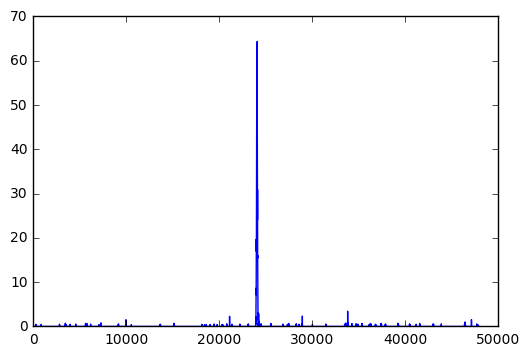

KeyboardInterrupt: 

In [65]:
for i in range(91):
    cwf = np.sum(f.root.ZS.PMT[i] * adc_to_pes, axis=0)
    print(cwf[cwf>5.].sum())
    plt.plot(cwf)
    plt.show()
    raw_input(">")

In [67]:
fm = tb.open_file("/Users/Gonzalo/github/IC/data/DATA/test_pmap_2980.h5")

[ 18.79826081  -0.24163754]


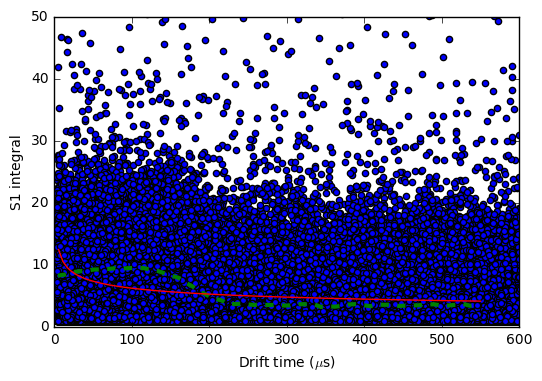

In [70]:
z = DS.Z
s1 = DS.S

z = np.array(z)
s1 = np.array(s1)
h = plt.scatter(z, s1)

zp, Ep, Ee = fit.profileX(z, s1, 60, (0., 550.))
plt.plot(zp, Ep, "g--", linewidth=3)

f, v, e = fit.fit("power", zp, Ep, (1., 0.7))
zz = np.linspace(0., 550., 100.)
plt.plot(zz, f(zz), "r-")
plt.xlabel("Drift time ($\mu$s)")
plt.ylabel("S1 integral")
plt.xlim((0,600))
plt.ylim((0,50))
print(v)